In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:
df = pd.read_csv("heart.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


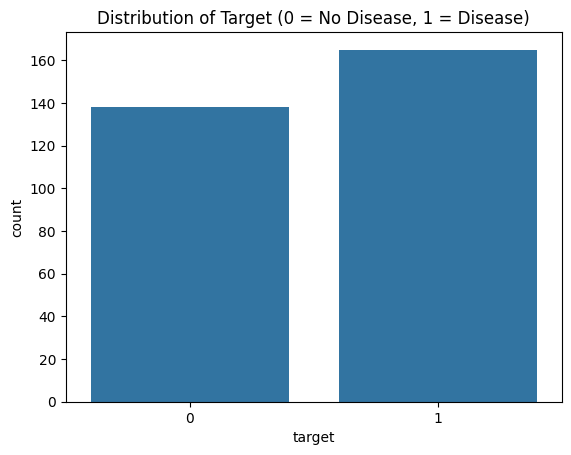

In [17]:
sns.countplot(x=y)
plt.title("Distribution of Target (0 = No Disease, 1 = Disease)")
plt.show()


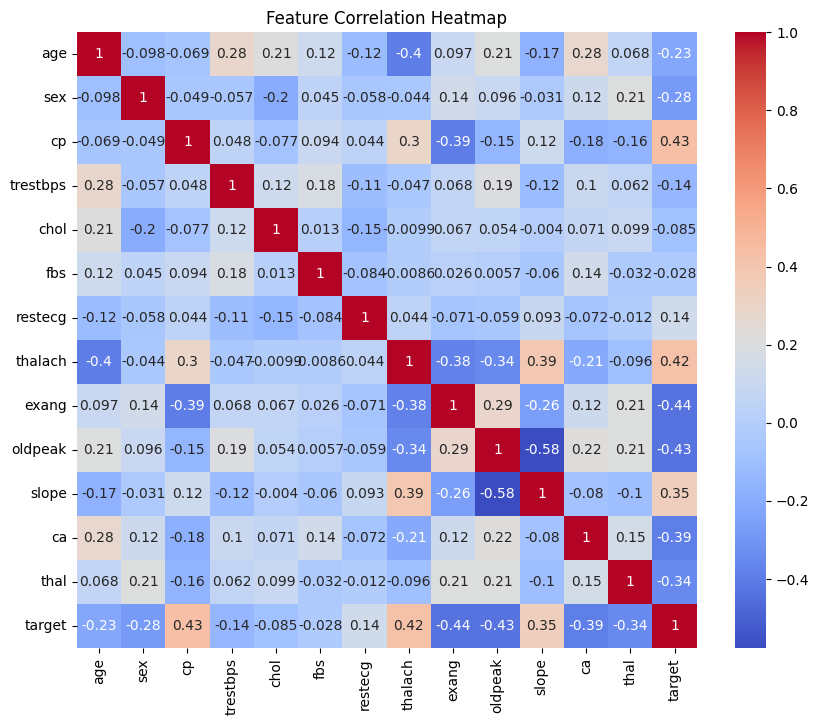

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
X = df.drop("target", axis=1)  # independent variables
y = df["target"]               # dependent variable (0 = no disease, 1 = disease)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8032786885245902

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



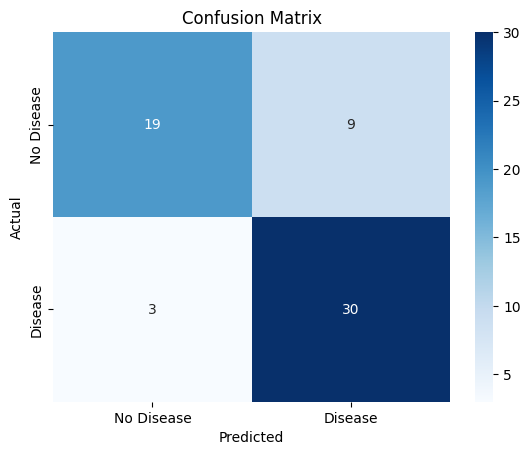

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Basic metrics
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

# Confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create results table
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "True Positives", "True Negatives", "False Positives", "False Negatives"],
    "Value": [accuracy, precision, recall, f1, tp, tn, fp, fn]
})

print(results)

            Metric      Value
0         Accuracy   0.803279
1        Precision   0.769231
2           Recall   0.909091
3         F1-Score   0.833333
4   True Positives  30.000000
5   True Negatives  19.000000
6  False Positives   9.000000
7  False Negatives   3.000000


In [20]:
print("Training Score:", model.score(X_train, y_train))
print("Testing Score:", model.score(X_test, y_test))


Training Score: 0.8512396694214877
Testing Score: 0.8032786885245902


In [21]:
coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeff)


     Feature  Coefficient
2         cp     0.919886
10     slope     0.433609
6    restecg     0.401310
7    thalach     0.025867
0        age     0.004353
4       chol    -0.009257
3   trestbps    -0.011816
5        fbs    -0.166352
9    oldpeak    -0.523609
11        ca    -0.536540
8      exang    -0.864644
12      thal    -0.979238
1        sex    -1.311725
